In [20]:
# 01_EDA_and_data_checks.ipynb — starter code
# Notebook content scaffold to load data, check classes, and basic EDA.


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
import pandas as pd

# Go up one level (..) and then into the data folder
file_path = "../preprocessed_tabular_data/prepared_dataset.csv"

data = pd.read_csv(file_path)

# Preview
print("Data shape:", data.shape)
print(data.head())

Data shape: (15557, 11)
      obj_id object_name source  label    label_source    period  duration  \
0   10000162   K04902.01    KOI    1.0       CANDIDATE  0.341224  1.763818   
1   10000490   K07269.01    KOI    0.0  FALSE POSITIVE -0.047436  0.073981   
2   10000941   K04146.02    KOI    1.0       CANDIDATE -0.046319 -0.487981   
3   10001368   K02785.01    KOI    1.0       CONFIRMED -0.044228 -0.238062   
4  100014359   100014359    TOI    1.0              PC -0.048290 -0.661582   

      depth  stellar_radius  stellar_mass  stellar_mag  
0 -0.266995       -0.166214     -0.885991     1.070443  
1  0.717291        0.067485      1.641205    -0.945346  
2 -0.274511       -0.154789     -0.765289     0.287357  
3 -0.271331       -0.100363      0.256905     0.520166  
4  0.015963       -0.124460     -0.101429     0.220714  


In [22]:
# Identify label column (assumed 'label' or 'operation_kind_id' in prep step)
label_col = 'label' if 'label' in data.columns else 'operation_kind_id'


# Map labels to binary (planet candidate = 1, false positive = 0)
label_mapping = {
'planet candidate': 1,
'false positive': 0,
1: 1,
0: 0
}
data[label_col] = data[label_col].map(label_mapping)


# Check distribution of labels
class_counts = data[label_col].value_counts()
print("Class distribution:\n", class_counts)

Class distribution:
 label
1    9726
0    5831
Name: count, dtype: int64


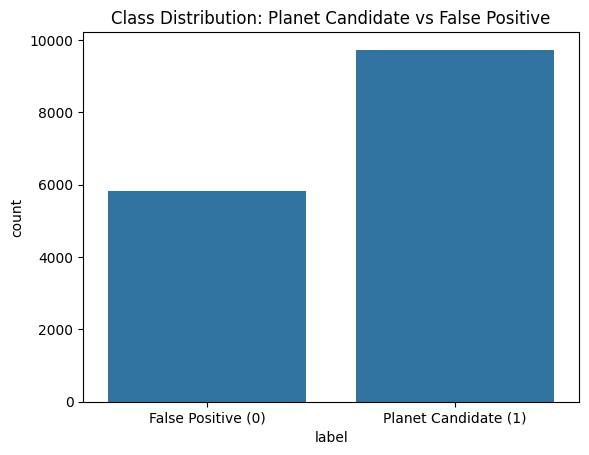

In [23]:
# Plot class distribution
sns.countplot(x=label_col, data=data)
plt.title("Class Distribution: Planet Candidate vs False Positive")
plt.xticks([0, 1], ["False Positive (0)", "Planet Candidate (1)"])
plt.show()

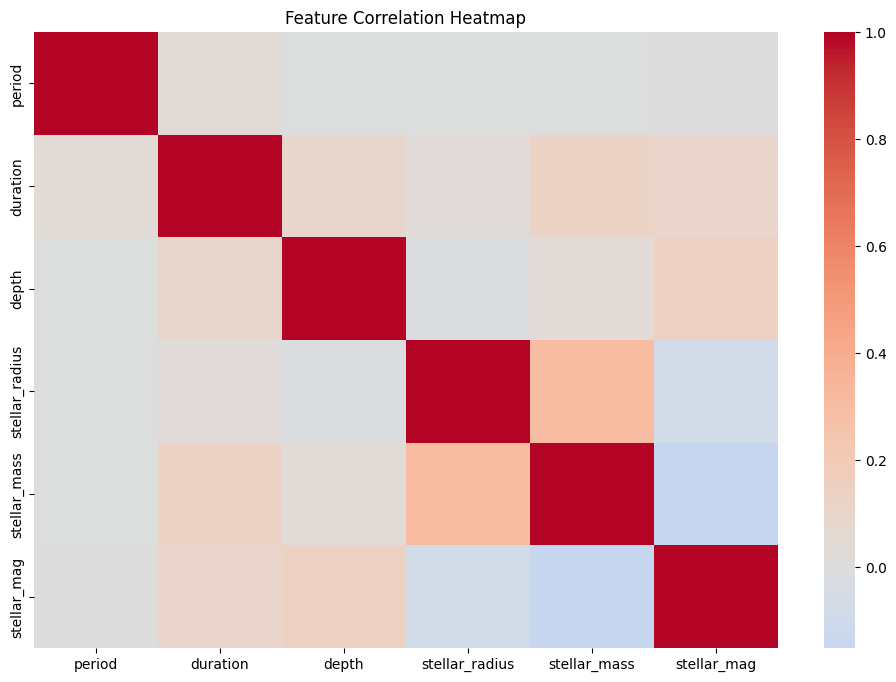

In [24]:
# Select only numeric columns (excluding label if you like)
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Optionally drop label column if you don't want it in correlations
numeric_data = numeric_data.drop(columns=[label_col], errors='ignore')

# Compute correlation
corr_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0, annot=False)
plt.title("Feature Correlation Heatmap")
# Save the figure first
plt.savefig("../plots_of_experiment_on_tabular_dataset/feature_correlation_heatmap.png")

# THEN show it
plt.show()

In [25]:
# Missing values check
missing = data.isnull().sum()
print("Missing values per column:\n", missing[missing > 0])


# Basic stats
print(data.describe(include='all'))

Missing values per column:
 obj_id    1
dtype: int64
          obj_id object_name source         label    label_source  \
count      15556       15557  15557  15557.000000           15557   
unique     15556       15557      3           NaN               7   
top     10000162   K04902.01    KOI           NaN  FALSE POSITIVE   
freq           1           1   8214           NaN            4640   
mean         NaN         NaN    NaN      0.625185             NaN   
std          NaN         NaN    NaN      0.484091             NaN   
min          NaN         NaN    NaN      0.000000             NaN   
25%          NaN         NaN    NaN      0.000000             NaN   
50%          NaN         NaN    NaN      1.000000             NaN   
75%          NaN         NaN    NaN      1.000000             NaN   
max          NaN         NaN    NaN      1.000000             NaN   

              period      duration         depth  stellar_radius  \
count   1.555700e+04  1.555700e+04  1.555700e+04  

In [26]:
# Save EDA summary
summary = {
'shape': data.shape,
'class_counts': class_counts.to_dict(),
'missing_columns': missing[missing > 0].to_dict()
}
pd.DataFrame.from_dict(summary, orient='index').to_csv("../metrics/eda_summary.csv")


print("EDA summary saved to metrics/eda_summary.csv")

EDA summary saved to metrics/eda_summary.csv
